In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
style.use('ggplot')
import math 

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML Models/Stock_Data_Set.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,1/2/1970,2.2972,2.3178,2.2972,2.2972,26437,0
1,1/5/1970,2.2972,2.2972,2.2544,2.2759,29887,0
2,1/6/1970,2.2759,2.2759,2.2342,2.2342,106900,0
3,1/7/1970,2.2342,2.2342,2.2342,2.2342,85061,0
4,1/8/1970,2.2342,2.2342,2.2139,2.2139,66669,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12074 entries, 0 to 12073
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     12074 non-null  object 
 1   Open     12074 non-null  float64
 2   High     12074 non-null  float64
 3   Low      12074 non-null  float64
 4   Close    12074 non-null  float64
 5   Volume   12074 non-null  int64  
 6   OpenInt  12074 non-null  int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 660.4+ KB


In [5]:
df = df[["Open",	"High",	"Low",	"Close",	"Volume"]]

**High Low Percentage**

In [6]:
df["HL_PCT"] = (df["High"] - df["Low"]) / df["Close"] * 100

In [7]:
df.head()

,Open,High,Low,Close,Volume,HL_PCT
0,2.2972,2.3178,2.2972,2.2972,26437,0.896744
1,2.2972,2.2972,2.2544,2.2759,29887,1.880575
2,2.2759,2.2759,2.2342,2.2342,106900,1.866440
3,2.2342,2.2342,2.2342,2.2342,85061,0.000000
4,2.2342,2.2342,2.2139,2.2139,66669,0.916934


**Percentage Change**

In [8]:
df["PCT_change"] = (df["Close"] - df["Open"]) / df["Open"] * 100
df = df[["Close", "HL_PCT", "PCT_change", "Volume"]]
df.head()

,Close,HL_PCT,PCT_change,Volume
0,2.2972,0.896744,0.000000,26437
1,2.2759,1.880575,-0.927216,29887
2,2.2342,1.866440,-1.832242,106900
3,2.2342,0.000000,0.000000,85061
4,2.2139,0.916934,-0.908603,66669


In [9]:
pre_col = "Close"
df.fillna(value=-99999, inplace=True)
pre_out = int(math.ceil(0.002 * len(df)))
df["label"] = df[pre_col].shift(-pre_out)
df.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

In [10]:
X = np.array(df.drop(["label"], 1))
y = np.array(df["label"])
X = preprocessing.scale(X)
y = np.array(df["label"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#### classifire
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)
print(confidence)

0.970601929436044


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(ind

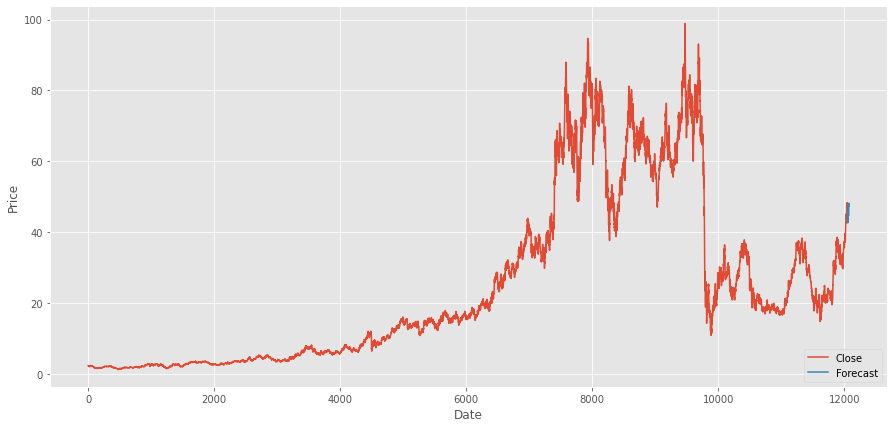

In [11]:
X_lately = X[-pre_out:]
df.dropna(inplace=True)

y = np.array(df["label"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)

forecast_set = clf.predict(X_lately)

df["Forecast"] = np.nan

last_date = df.iloc[-1].name
#last_unix = last_date.timestamp()
one_day = 86400
#next_unix = last_unix + one_day
next_unix = last_date + one_day

for i in forecast_set:
  next_date = datetime.datetime.fromtimestamp(next_unix)
  next_unix += 86400
  df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]

df["Close"].plot(figsize=(15,7))
df["Forecast"].plot(figsize=(15,7))
plt.legend(loc=4)
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()